# **Notebook used at Challenge of Module 2 in the Discipline of Predicitive Models at Bootcamp Machine Learning IGTI.**

In this Challenge, all concepts presented during the course Predictive Models and Time Series (MPT) will be addressed. For this Challenge, a modified version of the “Wine Quality” dataset available at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine) will be used. This dataset contains a set of attributes (sensor data) about the wine making process (red and white). These data are used to classify, at the end of the process, the quality of the wine obtained. There is information such as alcohol content and acidity level.

In [ ]:
#importinf of the dataset
from google.colab import files
uploaded = files.upload()


Saving winequality-red.csv to winequality-red.csv


In [ ]:
#import libraries
import numpy as np #library to work with matrices and vectors
import pandas as pd #library to work with dataframes
import datetime #library to work with date
from matplotlib import pyplot as plt  #library to plot graphs
import seaborn as sns #plot graphs more "elegant"


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# download dataset for reading
df_wine = pd.read_csv('winequality-red.csv' , sep=';' )


EDA - Exploratory Data Analysis
Pre Processing 
Data preparation.
Comparison and adjustment of classification models.

In [ ]:
# showing the characteristics of dataset
df_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#checking the dimension of dataset (instances and attributes)
df_wine.shape


(1599, 12)

In [ ]:
print ("Input:  {}".format(df_wine.shape[0]))
print ("Variables:  {}".format(df_wine.shape[1]))


Input:  1599
Variables:  12


In [ ]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
len(df_wine.dtypes.value_counts())

2

In [ ]:
#checking the "characteristics" of the columns
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#showing the null values
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df_wine.count()


fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [ ]:
#percentual calculation of null values in each column
df_wine.isnull().sum() * 100 / df_wine.count()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [ ]:
#statistics of dataset
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Calculation of Pearson's Correlation Coefficient between the variables "fixed acidity" and "pH"
df_wine[['fixed acidity', 'pH']].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


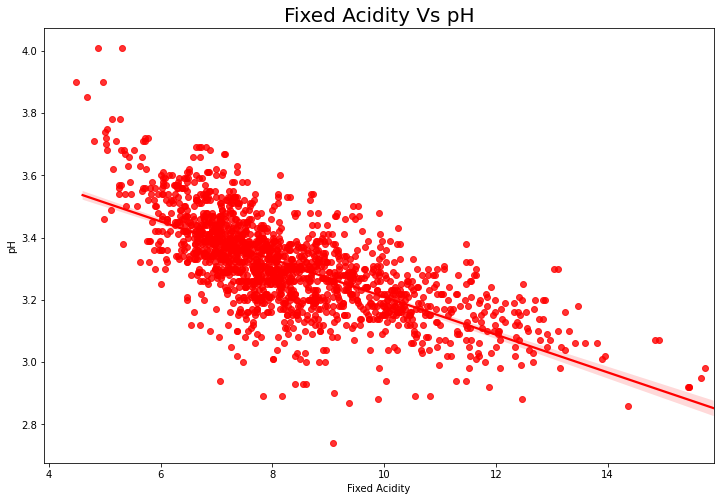

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x = 'fixed acidity', y = 'pH', data = df_wine, color = 'r', x_jitter=0.2)
plt.xlabel("Fixed Acidity")
plt.ylabel("pH")
plt.title("Fixed Acidity Vs pH", fontsize = 20)
plt.show()

In [ ]:
#Calculation of Pearson's Correlation Coefficient between the variables "quality" and "alcohol"
df_wine[['quality', 'alcohol']].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


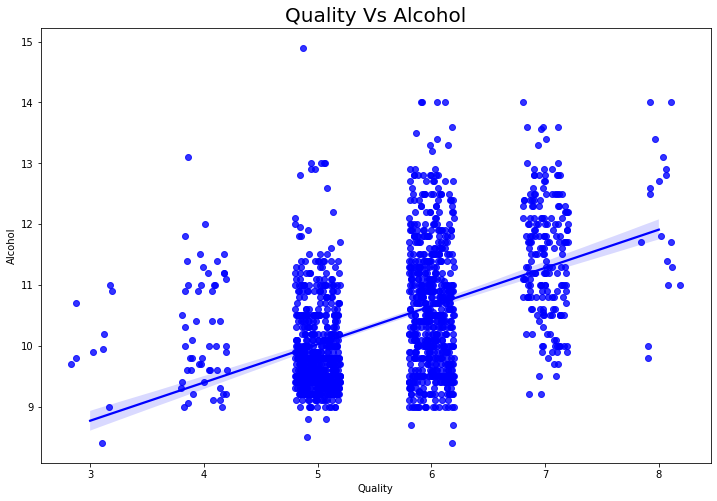

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x = 'quality', y = 'alcohol', data = df_wine, color = 'b', x_jitter=0.2)
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.title("Quality Vs Alcohol", fontsize = 20)
plt.show()

Checking the instances of Column "quality"


In [ ]:
df_wine['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#Checking quantity of instances whose wine quality is equal to 5
len(df_wine[df_wine['quality'] == 5])

681

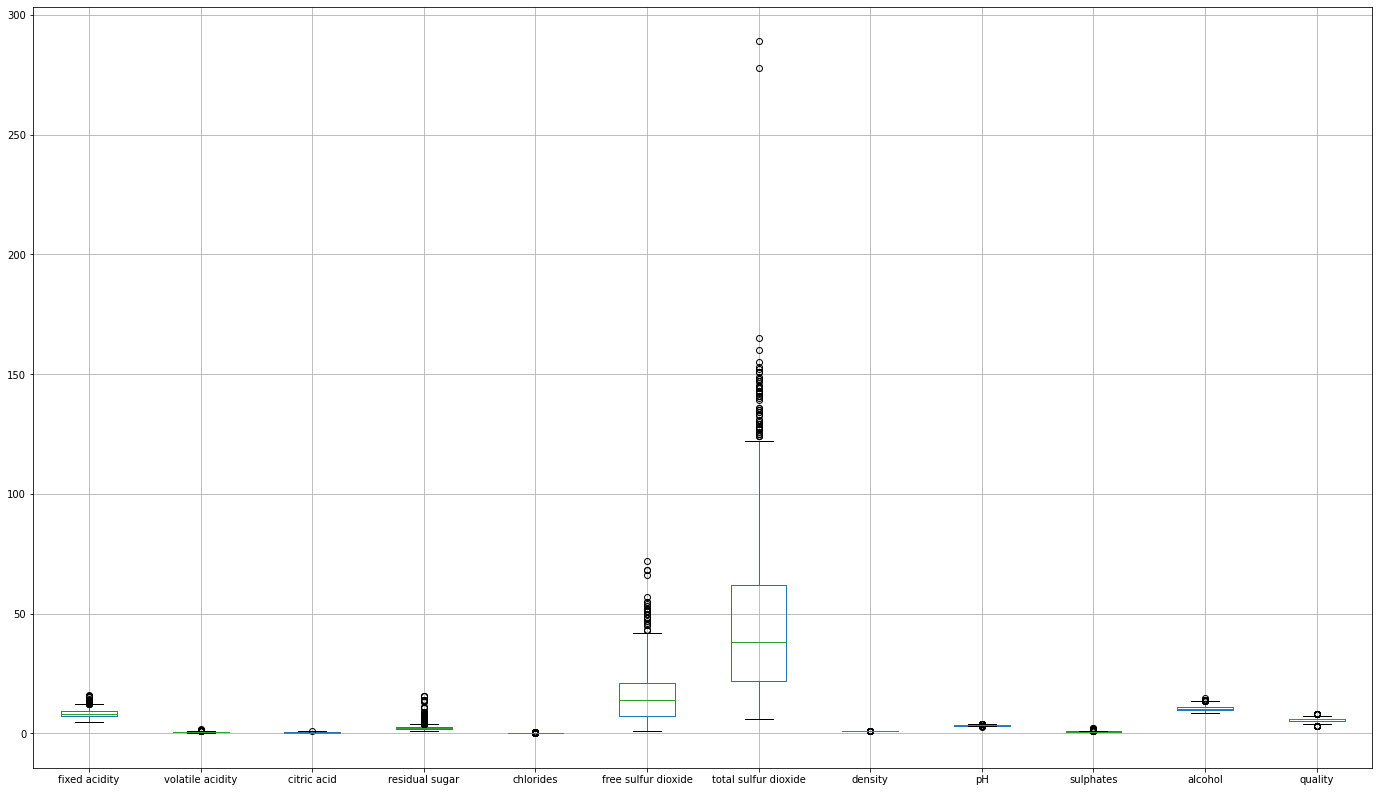

In [ ]:
#boxplot of the dataset
df_wine.boxplot(figsize = (24,14))

**Data Preparation**

In [ ]:
##Separating the dataset into independent variables (predictors) and dependent variable (outcome)
x = df_wine.iloc[:,:-1]
y = df_wine.iloc[:,-1]

In [ ]:
##Normalizing the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
array_scaler = scaler.fit_transform(x)
col = x.columns


In [ ]:
#Checking the data after normalization
df_wine_norm = pd.DataFrame(array_scaler, columns = col)
df_wine_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [ ]:
#Finding the minimum value of the variable "fixed acidity"
df_wine_norm['fixed acidity'].min()

0.0

**Comparison and adjustment of classification models.**

In [ ]:
#split the dataset for training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_wine_norm,y,test_size = 0.3, random_state = 1)

**Model building **

KNN

Decision Tree

RandomForest

SVM

MLP




**KNN**

In [ ]:
#applying the K Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) # using the five closest neighbors
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)


In [ ]:
#verification of the Accuracy of the KNN Model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy KNN: {}",format(accuracy))


Accuracy KNN: {} 0.5645833333333333


**Decision Tree**

In [ ]:
#applying the Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(x_train,y_train)
y_arvore_pred = clf_arvore.predict(x_test)


In [ ]:
#verification of the Accuracy of the Decision Tree
accuracy_tree = accuracy_score(y_test,y_arvore_pred)
print("Accuracy DecisionTree: {}".format(accuracy_tree))


Accuracy DecisionTree: 0.5958333333333333


**RandomForest**

In [ ]:
#applying the RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(max_depth = 10, random_state = 1)
clf_forest.fit(x_train,y_train)
y_pred_forest = clf_forest.predict(x_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)


In [ ]:
#verification of Accuracy of the RandomForest Model
print("Accuracy RandomForest: {} ".format(accuracy_forest))


Accuracy RandomForest: 0.6791666666666667 


**SVM**

In [ ]:
#applying the SVM algorithm
from sklearn.svm import SVC
clf_svm = SVC(gamma = 'auto', kernel = 'rbf')
clf_svm.fit(x_train,y_train)
y_pred_svm = clf_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test,y_pred_svm)


In [ ]:
#verification of the Accuracy of the SVM Model
print("Accuracy SVM: {}".format(accuracy_svm))


Accuracy SVM: 0.5854166666666667


**MLP**

In [ ]:
#applying the MLP algorithm MLP (Multiplayer Perceptron)
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(alpha = 1e-5,hidden_layer_sizes = (5,5), random_state = 1)
clf_mlp.fit(x_train,y_train)
y_pred_mlp = clf_mlp.predict(x_test)
accuracy_mlp = accuracy_score(y_test,y_pred_mlp)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#verification of the Accuracy MLP Model
print("Accuracy MLP: {}".format(accuracy_mlp))

Accuracy MLP: 0.6


Modifying the dataset to a binary system that considers wines with a score greater than 5 (6, 7, 8) to be good and less than or equal to 5 bad (5, 4, 3), and applying the RandomForest Model.



In [ ]:
#creats a copy of dataset to a binary system
df_wine_modify = df_wine.copy()

In [ ]:
#separating the data
x_new = df_wine_modify.iloc[:,:11]
y_new = df_wine_modify.quality


In [ ]:
#creating a variables dictionary
y_new = y_new.replace({6:1,7:1,8:1,5:0,4:0,3:0})

In [ ]:
#applying the normalization
scaler_new = MinMaxScaler()
new_array = scaler_new.fit_transform(x_new)
df_wine_array = pd.DataFrame(new_array, columns = x_new.columns)
df_wine_array.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [ ]:
##spliting data from the new dataset into training data and test data

x_train,x_test,y_train,y_test = train_test_split(new_array,y_new,test_size = 0.3, random_state = 1)

In [ ]:
#applying the Random Forest Algorithm to new dataset
clf_forest_new = RandomForestClassifier(max_depth=10, random_state = 1)
clf_forest_new.fit(x_train,y_train)
y_pred_new_forest = clf_forest_new.predict(x_test)
accuracy_forest_new = accuracy_score(y_test,y_pred_new_forest)


In [ ]:
#verification the Accuracy with RandomForest in the new dataset
print("Accuracy RandomForest: {}".format(accuracy_forest_new))

Accuracy RandomForest: 0.8041666666666667
